<a href="https://colab.research.google.com/github/sakusakupanda03/BachelorThesis/blob/main/notebooks/05_calculate_features_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

path = "../data"
path = "/content/drive/MyDrive/sotsuron/data"

# 集計

In [ ]:
m4_lr = pd.read_pickle(path + "/04_reporting/num_train_months_4_lr.pickle").T
m4_lr.name='m4_lr'
m4_lr.index.name="year_month"
m9_lr = pd.read_pickle(path + "/04_reporting/num_train_months_9_lr.pickle").T
m9_lr.name = 'm9_lr'
m9_lr.index.name='year_month'
m4_rf = pd.read_pickle(path + "/04_reporting/num_train_months_4_rf.pickle").T
m4_rf.name = 'm4_rf'
m4_rf.index.name='year_month'
m9_rf = pd.read_pickle(path + "/04_reporting/num_train_months_9_rf.pickle").T
m9_rf.name = 'm9_rf'
m9_rf.index.name="year_month"
m4_lr.columns

Index(['BTC PACF Scores', 'ETH PACF Scores', 'BTC Train Scores',
       'ETH Train Scores', 'BTC Test Scores', 'ETH Test Scores',
       'BTC Features Importance', 'ETH Features Importance'],
      dtype='object')

In [ ]:
btc_variables = ['market-cap', 'price_change', 'avg-block-size', 'avg-confirmation-time',
                'hash-rate', 'difficulty', 'miners-revenue', 'transaction-fees',
                'fees-usd-per-transaction', 'n-unique-addresses', 'n-transactions', 'price_change_binary']
eth_variables = ['export-MarketCap', 'price_change', 'export-BlockSize', 'export-BlockTime',
                'export-NetworkHash', 'export-BlockDifficulty', 'export-GasUsed', 'export-TransactionFee',
                'export-AverageDailyTransactionFee', 'export-DailyActiveEthAddress', 'export-verified-contracts', 'price_change_binary']

m4_rf_fi = m4_rf[["BTC Features Importance", "ETH Features Importance"]]
m9_rf_fi = m9_rf[["BTC Features Importance", "ETH Features Importance"]]

btc_m4 = {varname: [] for varname in btc_variables}
for period in m4_rf_fi.index:
    for varnum in range(len(m4_rf_fi['BTC Features Importance'][0])):
        btc_m4[btc_variables[varnum]] += [m4_rf_fi['BTC Features Importance'][period][varnum]]
btc_m4_fi = pd.DataFrame(btc_m4)
btc_m4_fi.index = m4_rf.index

btc_m9 = {varname: [] for varname in btc_variables}
for period in m9_rf_fi.index:
    for varnum in range(len(m9_rf_fi['BTC Features Importance'][0])):
        btc_m9[btc_variables[varnum]] += [m9_rf_fi['BTC Features Importance'][period][varnum]]
btc_m9_fi = pd.DataFrame(btc_m9)
btc_m9_fi.index = m9_rf.index

eth_m4 = {varname: [] for varname in eth_variables}
for period in m4_rf_fi.index:
    for varnum in range(len(m4_rf_fi['ETH Features Importance'][0])):
        eth_m4[eth_variables[varnum]] += [m4_rf_fi['ETH Features Importance'][period][varnum]]
eth_m4_fi = pd.DataFrame(eth_m4)
eth_m4_fi.index = m4_rf.index

eth_m9 = {varname: [] for varname in eth_variables}
for period in m9_rf_fi.index:
    for varnum in range(len(m9_rf_fi['ETH Features Importance'][0])):
        eth_m9[eth_variables[varnum]] += [m9_rf_fi['ETH Features Importance'][period][varnum]]
eth_m9_fi = pd.DataFrame(eth_m9)
eth_m9_fi.index = m9_rf.index

# 月ごと変数ごと・銘柄別の可視化

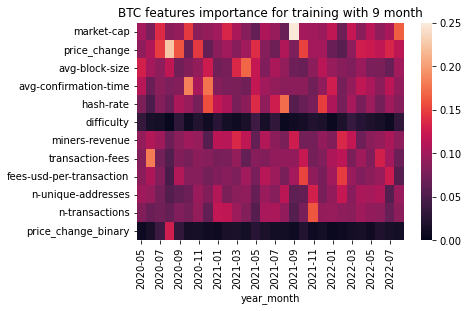

In [ ]:
plt.figure()
plt.title("BTC features importance for training with 9 month")
sns.heatmap(btc_m9_fi.T, vmin=0, vmax=0.25)
plt.show()

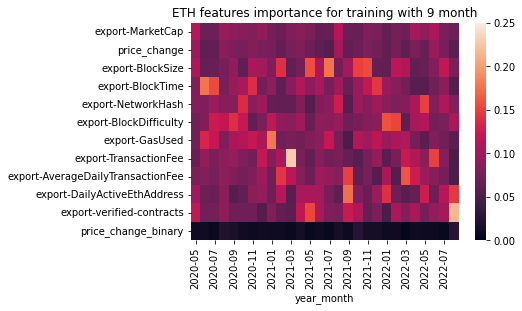

In [ ]:
plt.figure()
plt.title("ETH features importance for training with 9 month")
sns.heatmap(eth_m9_fi.T, vmin=0, vmax=0.25)
plt.show()

# 月ごと銘柄ごと・変数別の可視化

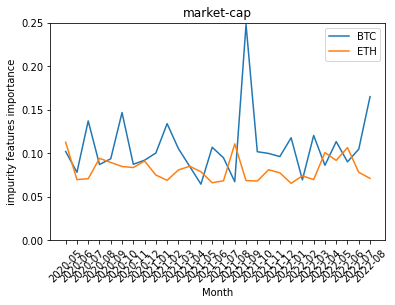

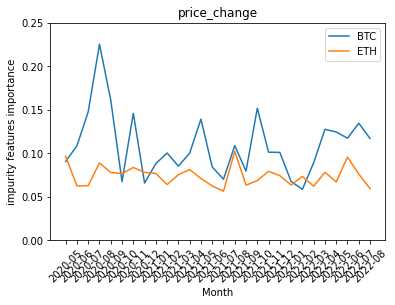

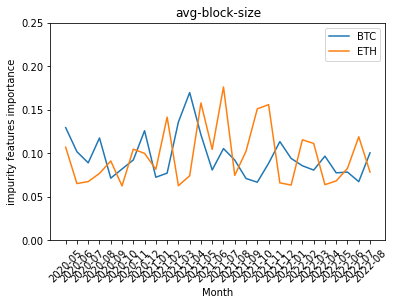

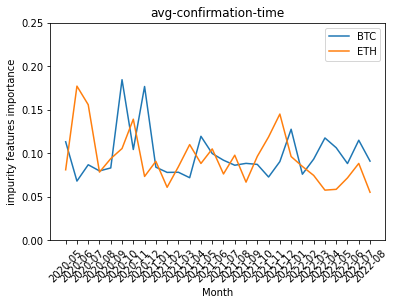

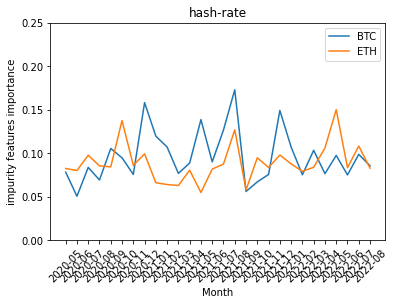

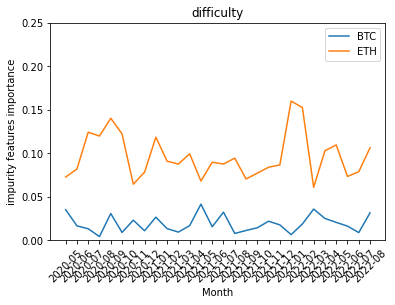

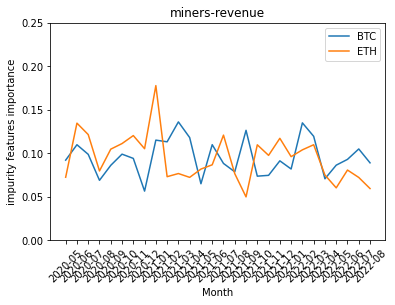

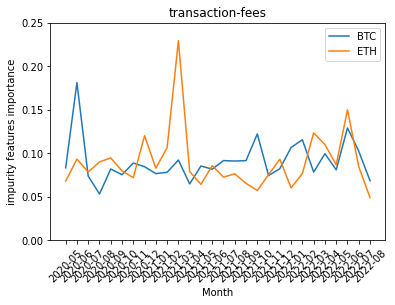

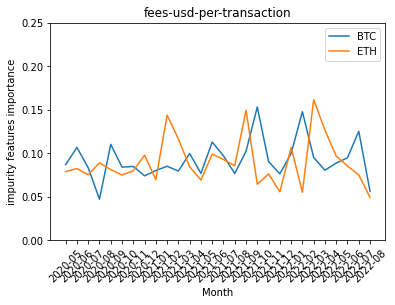

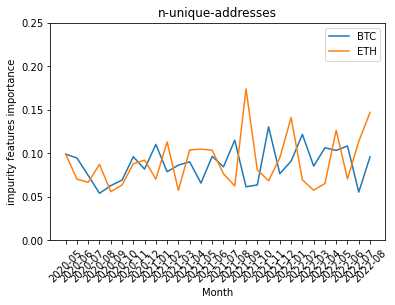

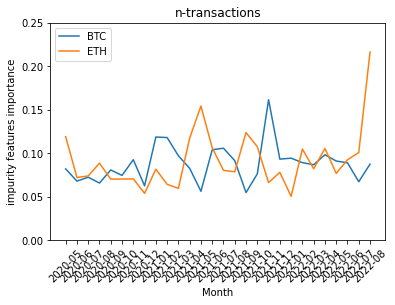

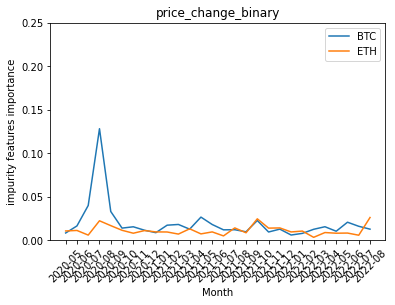

In [ ]:
for varnum in range(len(btc_variables)):
    plt.title(btc_variables[varnum])
    plt.plot(btc_m9_fi[btc_variables[varnum]], label='BTC')
    plt.plot(eth_m9_fi[eth_variables[varnum]], label='ETH')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.ylim(0, 0.25)
    plt.ylabel('impurity features importance')
    plt.legend()
    plt.show()

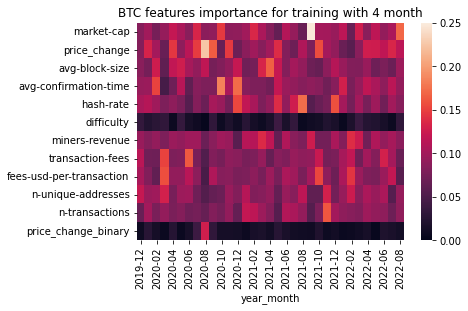

In [ ]:
plt.figure()
plt.title("BTC features importance for training with 4 month")
sns.heatmap(btc_m4_fi.T, vmin=0, vmax=0.25)
plt.show()

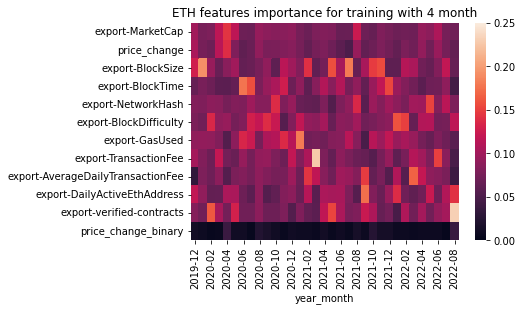

In [ ]:
plt.figure()
plt.title("ETH features importance for training with 4 month")
sns.heatmap(eth_m4_fi.T, vmin=0, vmax=0.25)
plt.show()

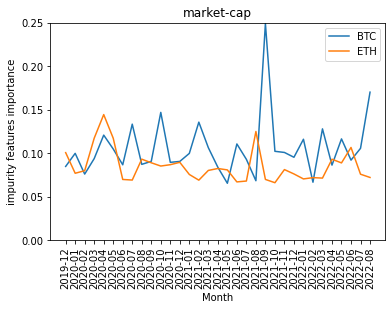

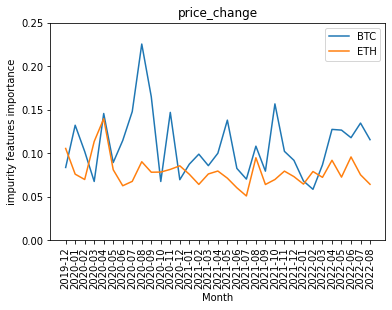

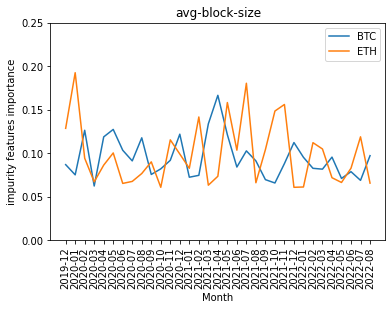

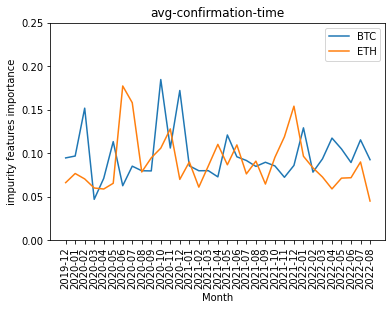

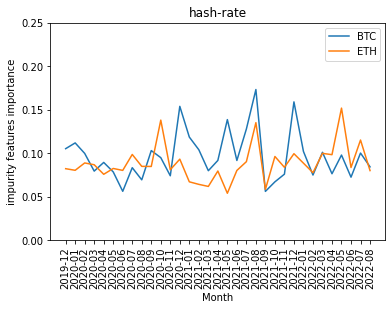

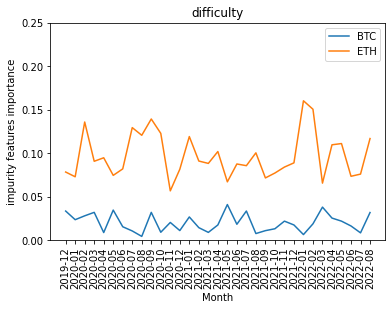

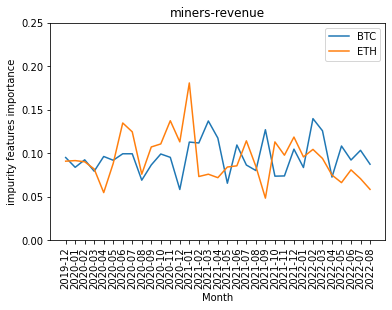

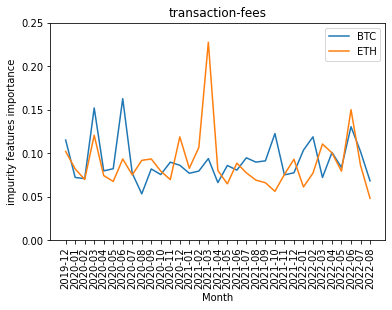

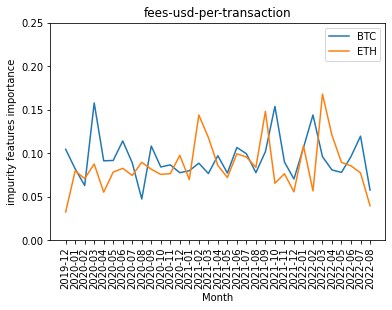

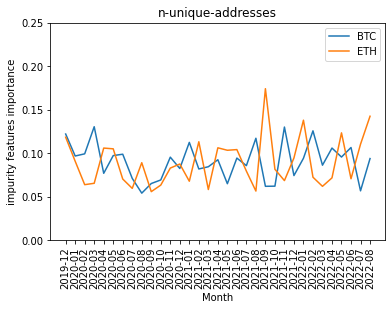

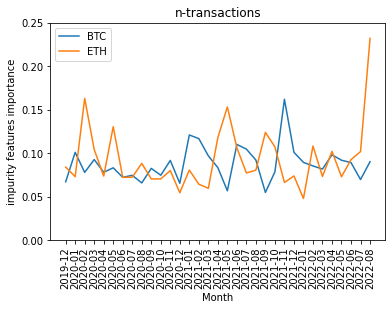

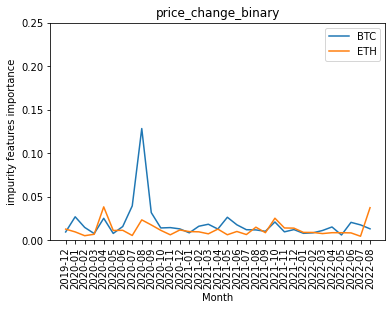

In [ ]:
for varnum in range(len(btc_variables)):
    plt.title(btc_variables[varnum])
    plt.plot(btc_m4_fi[btc_variables[varnum]], label='BTC')
    plt.plot(eth_m4_fi[eth_variables[varnum]], label='ETH')
    plt.xlabel('Month')
    plt.xticks(rotation=90)
    plt.ylim(0, 0.25)
    plt.ylabel('impurity features importance')
    plt.legend()
    plt.show()